# Перед знаком стоп

Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь между полом и стилем вождения автомобиля! 
https://stepik.org/lesson/26448/step/7

In [6]:
from scipy import stats
chi2, p_value, dof, ev = stats.chi2_contingency(([20,15],[11,12],[7,9]))
print(f'''
Хи квадрат {chi2}
p-value {p_value}
Степеней свобод {dof}
Ожидаемые наблюдения
{ev}
''')


Хи квадрат 0.9544070774762996
p-value 0.6205162173513055
Степеней свобод 2
Ожидаемые наблюдения
[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]



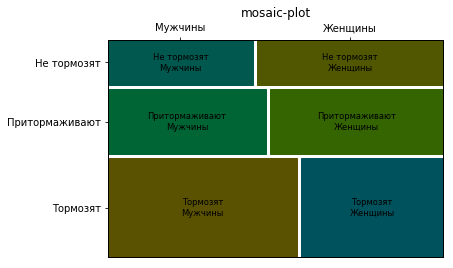

In [12]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

tab = pd.DataFrame({
    'Мужчины': [20, 11, 7],
    'Женщины': [15, 12, 9]
})

tab.index = ('Тормозят', 'Притормаживают', 'Не тормозят')
mosaic(tab.stack(), horizontal=False, title='mosaic-plot', statistic=True, gap=0.02)
plt.show()

# Аспирин

In [5]:
from scipy import stats
chi2, p_value, dof, ev = stats.chi2_contingency(([18,7],[6,13]))
print(f'''
Хи квадрат {chi2}
p-value {p_value}
Степеней свобод {dof}
Ожидаемые наблюдения
{ev}
''')


Хи квадрат 5.57719298245614
p-value 0.018195864430772903
Степеней свобод 1
Ожидаемые наблюдения
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]



x-squared = 5.57719298245614
p-value = 0.018195864430772903
df = 1


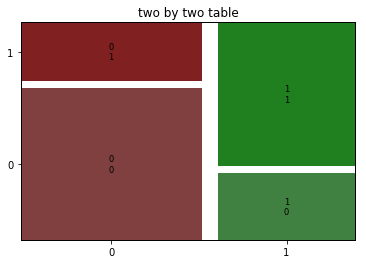

In [10]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

observed = np.array([[18, 7], [6, 13]])
chi2, p, df, expected = stats.chi2_contingency(observed)
print('x-squared =', chi2)
print('p-value =', p)
print('df =', df)

mosaic(observed, gap=0.05, title='two by two table')
plt.show()

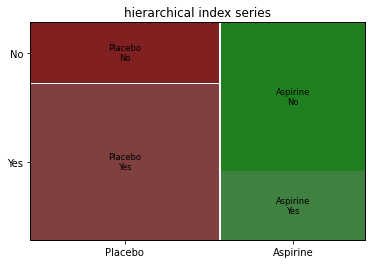

In [13]:
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt

tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)
mosaic(data, title='hierarchical index series')
plt.show()

In [14]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np

def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))


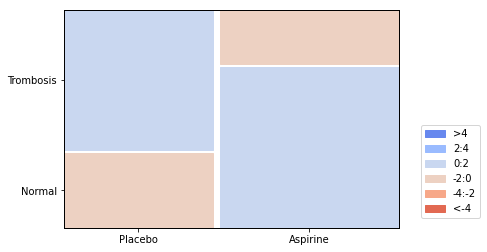

In [15]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)

make_me_plot(data)